## Classifying images using the Fashion-MNIST

Giovanne Lucas, 173317, g173317@dac.unicamp.br

Exploring machine learning techniques by using dimensionality reduction techniques.

Some of the code here presented was inspired by the following pratical guides:
[CNNs](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)
, [Fmnist-keras](https://www.pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/)
e [ConvNet classifier](https://medium.com/nanonets/how-to-classify-fashion-images-easily-using-convnets-81e1e0019ffe).    

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
# import model packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K

# import utility packages
import numpy as np
from google.colab.patches import cv2_imshow as cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from keras.utils import np_utils
from imutils import build_montages

# set the matplotlib backend so figures can be saved in the background
# import matplotlib
# matplotlib.use("Agg")
import matplotlib.pyplot as plt

# import the fashion mnist dataset
from keras.datasets import fashion_mnist

Using TensorFlow backend.


#### 1. Data preparation:

In [4]:
# grab the Fashion MNIST dataset
print("Loading Fashion MNIST...")
((x_train, y_train), (x_test, y_test)) = fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size = 0.25)

def shapping(inputShape, X_train, X_val, X_test):
    X_train = X_train.reshape((X_train.shape[0], inputShape[0], inputShape[1], inputShape[2]))
    X_val = X_val.reshape((X_val.shape[0], inputShape[0], inputShape[1], inputShape[2]))
    X_test = X_test.reshape((X_test.shape[0], inputShape[0], inputShape[1], inputShape[2]))
    print("Dataset X dimensionality after reshaping to fit the CNN:\n", X_train.shape)
    return X_train, X_val, X_test

def coding(Y_train, Y_val, Y_test):
    # one-hot encode the training and testing labels
    Y_train = np_utils.to_categorical(Y_train, 10)
    Y_val = np_utils.to_categorical(Y_val, 10)
    Y_test = np_utils.to_categorical(Y_test, 10)
    print("Dataset y dimensionality after one-hot encode:\n", Y_train.shape)
    return Y_train, Y_val, Y_test
    
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat",
    "sandal", "shirt", "sneaker", "bag", "ankle boot"]

# prepare data
x_train = x_train.reshape((x_train.shape[0], 784))
x_val = x_val.reshape((x_val.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))
scaler = StandardScaler()
scaler.fit(x_train)

classes = 10
inputShape = (28, 28, 1)
X_train, X_val, X_test = shapping(inputShape, x_train, x_val, x_test)
Y_train, Y_val, Y_test = coding(y_train, y_val, y_test)

Loading Fashion MNIST...
4423680/4422102 [==============================] - 0s 0us/step
Dataset X dimensionality after reshaping to fit the CNN:
 (45000, 28, 28, 1)
Dataset y dimensionality after one-hot encode:
 (45000, 10)


#### 2. Convolutional Neural Network with Keras:

In [0]:
def ConvNet(inputShape = (28,28,1), classes = 10):
    model = Sequential()
    # first CONV => RELU => POOL layer set
    model.add(Conv2D(32, kernel_size=(3, 3), 
                     padding="same",
                     activation="relu",
                     input_shape=inputShape)) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # second CONV => RELU => POOL layer set
    model.add(Conv2D(64, kernel_size=(3, 3),
                     padding="same",
                     activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # first (and only) set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    # print and return the constructed network architecture
    model.summary()
    return model

#### 3. Training the CNN without dimensionality reduction:

In [6]:
# initialize the number of epochs to train for and batch size
n_epochs = 20  # enough
batch_size = 256
# initialize the optimizer and model
print("Compiling model...")
model = ConvNet(inputShape, classes)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

# train the network
print("Training model...")
H = model.fit(X_train, Y_train,
    validation_data=(X_val, Y_val),
    batch_size=batch_size, epochs=n_epochs, verbose=1)

# make predictions on the test set
preds = model.predict(X_test)

# show a nicely formatted classification report
print("Evaluating network...")
print(classification_report(Y_test.argmax(axis=1), preds.argmax(axis=1),
    target_names=labelNames))

Compiling model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None,

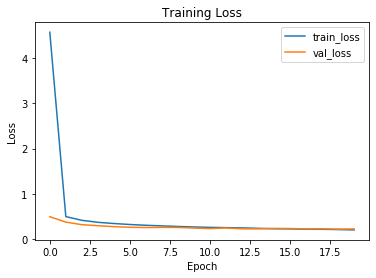

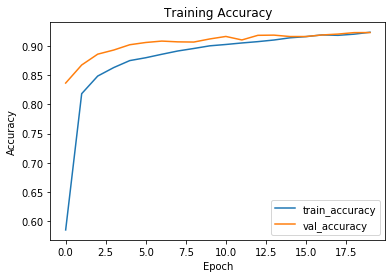

In [7]:
# plot the training loss and accuracy
def plot_loss(N, hist):
    plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")
    plt.title("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")
    plt.show()

def plot_acc(N, hist):
    plt.plot(np.arange(0, N), hist.history["acc"], label="train_accuracy")
    plt.plot(np.arange(0, N), hist.history["val_acc"], label="val_accuracy")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")
    plt.show()

plot_loss(n_epochs, H)
plot_acc(n_epochs, H)

#### 4. Dimensionality reduction through PCA:

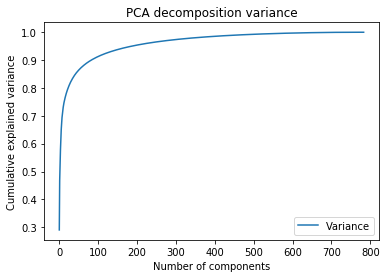

In [8]:
# Construct transform for PCA
X_sc_train = scaler.transform(x_train)
X_sc_val = scaler.transform(x_val)
X_sc_test = scaler.transform(x_test)
# note that the lowercase x hasn't been shaped into 28x28
# and uppercase Y is already ready
pca = PCA(n_components=784)
pca.fit(x_train)

# Plot PCA decomposition info
plt.plot(np.cumsum(pca.explained_variance_ratio_), label="Variance")
plt.title('PCA decomposition variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.legend(loc="lower right")

##### 4.a) 64 PCA components:

Dataset X dimensionality after reshaping to fit the CNN:
 (45000, 8, 8, 1)
Compiling model...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 8, 8, 32)          320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2, 2, 64)          0         
__________________________

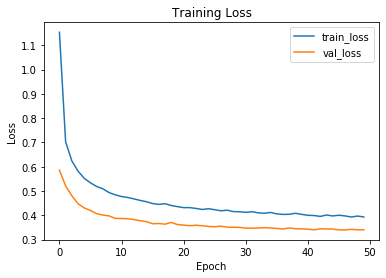

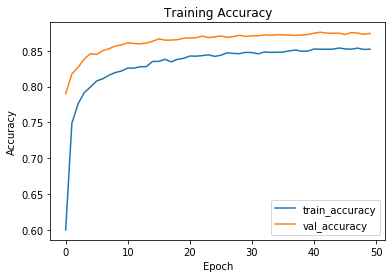

In [9]:
NCOMPONENTS = 64

pca = PCA(n_components=NCOMPONENTS)
X_64_train = pca.fit_transform(X_sc_train)
X_64_val = pca.transform(X_sc_val)
X_64_test = pca.transform(X_sc_test)
inputShape = (8, 8, 1)
X_64_train, X_64_val, X_64_test = shapping(inputShape, X_64_train, X_64_val, X_64_test)

# initialize the number of epochs
n_epochs = 50  # enough
# initialize the optimizer and model
print("Compiling model...")
model = ConvNet(inputShape, classes)
model.compile(loss="categorical_crossentropy", optimizer='adam',
    metrics=["accuracy"])

# train the network
print("Training model...")
H = model.fit(X_64_train, Y_train,
    validation_data=(X_64_val, Y_val),
    batch_size=batch_size, epochs=n_epochs, verbose = 1)

# make predictions on the test set
preds = model.predict(X_64_test)

# show a nicely formatted classification report
print("Evaluating network...")
print(classification_report(Y_test.argmax(axis=1), preds.argmax(axis=1),
    target_names=labelNames))

# plot the training loss and accuracy
plot_loss(n_epochs, H)
plot_acc(n_epochs, H)

##### 4.b) 144 PCA components:

Dataset X dimensionality after reshaping to fit the CNN:
 (45000, 12, 12, 1)
Compiling model...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 12, 12, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 3, 3, 64)          0         
________________________

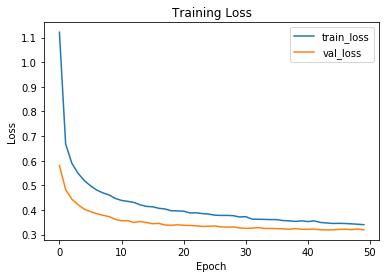

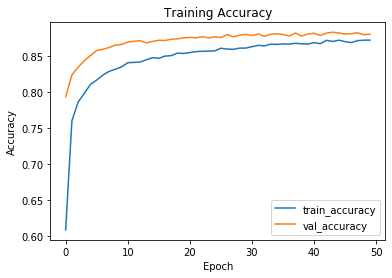

In [10]:
NCOMPONENTS = 144

pca = PCA(n_components=NCOMPONENTS)
X_144_train = pca.fit_transform(X_sc_train)
X_144_val = pca.transform(X_sc_val)
X_144_test = pca.transform(X_sc_test)

inputShape = (12, 12, 1)
X_144_train, X_144_val, X_144_test = shapping(inputShape, X_144_train, X_144_val, X_144_test)

# initialize the optimizer and model
print("Compiling model...")
model = ConvNet(inputShape, classes)
model.compile(loss="categorical_crossentropy", optimizer='adam',
    metrics=["accuracy"])

# train the network
print("Training model...")
H = model.fit(X_144_train, Y_train,
    validation_data=(X_144_val, Y_val),
    batch_size=batch_size, epochs=n_epochs, verbose=1)

# make predictions on the test set
preds = model.predict(X_144_test)

# show a nicely formatted classification report
print("Evaluating network...")
print(classification_report(Y_test.argmax(axis=1), preds.argmax(axis=1),
    target_names=labelNames))

# plot the training loss and accuracy
plot_loss(n_epochs, H)
plot_acc(n_epochs, H)

##### 4.c) 256 PCA components:

Dataset X dimensionality after reshaping to fit the CNN:
 (45000, 16, 16, 1)
Compiling model...
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 16, 16, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 4, 4, 64)          0         
________________________

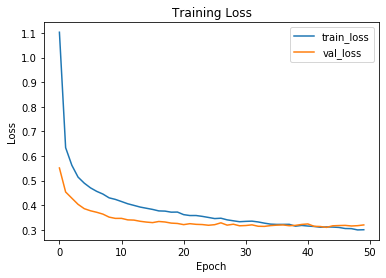

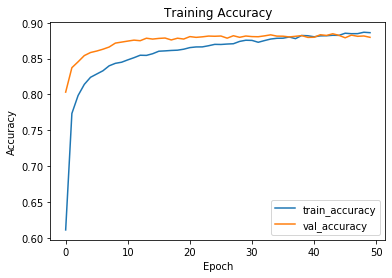

In [11]:
NCOMPONENTS = 256

pca = PCA(n_components=NCOMPONENTS)
X_256_train = pca.fit_transform(X_sc_train)
X_256_val = pca.transform(X_sc_val)
X_256_test = pca.transform(X_sc_test)

inputShape = (16, 16, 1)
X_256_train, X_256_val, X_256_test = shapping(inputShape, X_256_train, X_256_val, X_256_test)

# initialize the optimizer and model
print("Compiling model...")
model = ConvNet(inputShape, classes)
model.compile(loss="categorical_crossentropy", optimizer='adam',
    metrics=["accuracy"])

# train the network
print("Training model...")
H = model.fit(X_256_train, Y_train,
    validation_data=(X_256_val, Y_val),
    batch_size=batch_size, epochs=n_epochs, verbose=0)

# make predictions on the test set
preds = model.predict(X_256_test)

# show a nicely formatted classification report
print("Evaluating network...")
print(classification_report(Y_test.argmax(axis=1), preds.argmax(axis=1),
    target_names=labelNames))

# plot the training loss and accuracy
plot_loss(n_epochs, H)
plot_acc(n_epochs, H)